# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [5]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


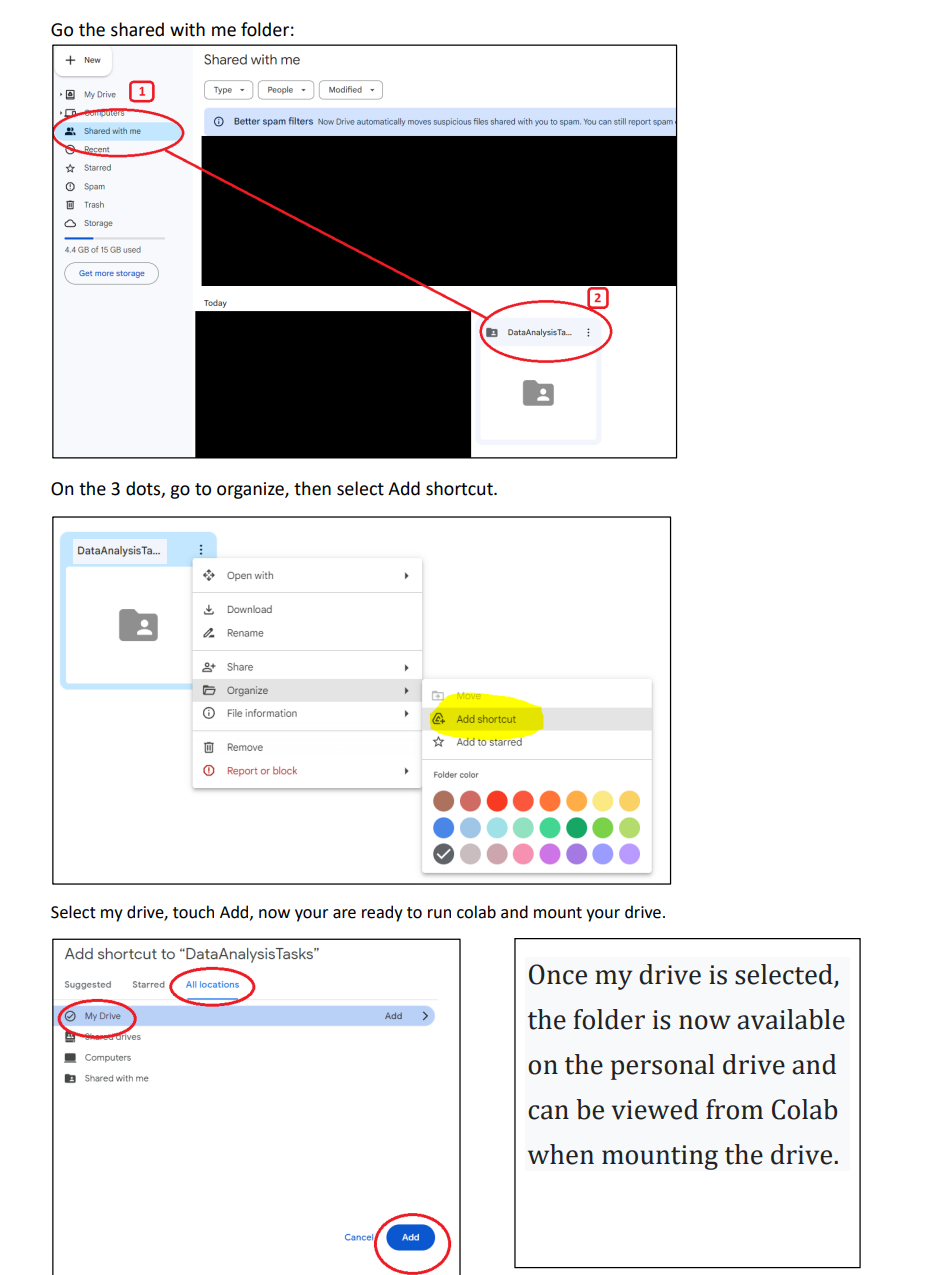

In [6]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [16]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.tile_providers import CARTODBPOSITRON
from pyproj import Transformer

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/bigfoot_locations.csv", encoding='ISO-8859-1')
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")

# Transforming coordinates from lat-long to Web Mercator
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")
df['longitude'], df['latitude'] = transformer.transform(df['latitude'].tolist(), df['longitude'].tolist())

# Extracting required columns
source = ColumnDataSource(data=dict(
    x=df['longitude'],
    y=df['latitude'],
    title=df['title'],
    classification=df['classification']
))

# Creating figure
p = figure(
    title="Bigfoot Sightings",
    x_axis_type="mercator",
    y_axis_type="mercator",
    tools="wheel_zoom,pan,reset"
)

# Adding map tile
p.add_tile(CARTODBPOSITRON)

# Adding circle glyphs
p.circle(
    x='x',
    y='y',
    size=10,
    fill_alpha=0.6,
    source=source
)

# Adding hover tool
hover = HoverTool()
hover.tooltips = [
    ("Title", "@title"),
    ("Classification", "@classification")
]
p.add_tools(hover)

# Displaying plot in the notebook
output_notebook()
show(p)


CSV file loaded successfully, you can start working right now
